In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from file_readers.CriminalActFileReader import CriminalActFileReader
from file_readers.LocationFileReader import LocationFileReader
from file_readers.OffenderFileReader import OffenderFileReader
from file_readers.PropertyFileReader import PropertyFileReader
from file_readers.OffenseFileReader import OffenseFileReader

property_file_reader = PropertyFileReader()
offense_file_reader = OffenseFileReader()
location_file_reader = LocationFileReader()
criminal_act_file_reader = CriminalActFileReader()
offender_file_reader = OffenderFileReader()

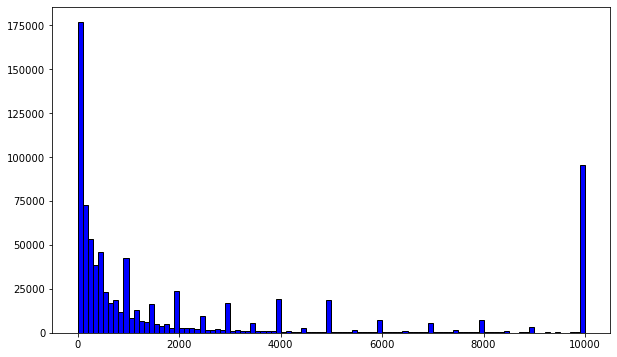

In [2]:
# HISTOGRAM OF PROPERTY VALUES
MAX_PROPERTY_VALUE_FOR_HISTOGRAM = 10000

property_df = property_file_reader.get_property_df()
property_values = property_df["property_value"].values
property_values = [min(MAX_PROPERTY_VALUE_FOR_HISTOGRAM, value) for value in property_values]

plt.figure(figsize=[10,6])
plt.hist(property_values, bins=100, color='blue', edgecolor='black');

In [3]:
# LIST OF MEAN PROPERTY VALUES FOR EACH CATEGORY OF PROPERTY
property_grouped = property_df.groupby("prop_desc_name")
property_grouped_sort_by_mean = property_grouped["property_value"].mean().sort_values(ascending=False)
property_grouped_sort_by_mean.head(n=25)

prop_desc_name
Aircraft                                    89726.034722
Building Materials                          19787.721239
Watercraft                                  19523.235142
Buses                                       19222.163551
Collections/ Collectibles                   17662.209158
Negotiable Instruments                      15324.764203
Trucks                                      15286.976420
Jewelry/ Precious Metals                    14860.185419
Recreational Vehicles                       13856.735922
Trailers                                    13482.855951
Industrial Equipment                        13384.356069
Automobile                                  12519.159827
Structure/ Single dwelling                  12294.600559
Farm Equipment                              12193.979647
Money                                       11960.382031
Other Motor Vehicles                        10121.315292
Drugs/ Narcotics                             8459.106973
Metals, Non-Prec

In [4]:
# 25 MOST COSTLY INCIDENTS
dataframe = property_file_reader.get_property_df()
dataframe = offense_file_reader.merge_offense_to_df(dataframe)
dataframe = location_file_reader.merge_location_to_df(dataframe)
dataframe = criminal_act_file_reader.merge_criminal_act_to_df(dataframe)
dataframe = offender_file_reader.merge_offender_to_df(dataframe)
dataframe = dataframe.sort_values(by="property_value", ascending=False)
dataframe.head(n=25)

,data_year,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,date_recovered,nibrs_prop_desc_id,prop_desc_id,property_value,...,ethnicity_id,notes,offender_id,offender_seq_num,race_code,race_desc,race_id,sex_code,sort_order,start_year
1769788,2023.0,181193892.0,187008341.0,7.0,NaN,NaN,NaN,NaN,42.0,124465227.0,...,50.0,Race is not specified,212793341.0,0.0,NS,Not Specified,99.0,X,99.0,NaN
932609,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064789.0,2.0,U,Unknown,98.0,M,98.0,NaN
932608,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064788.0,1.0,U,Unknown,98.0,M,98.0,NaN
932611,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064791.0,4.0,U,Unknown,98.0,M,98.0,NaN
932610,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064790.0,3.0,U,Unknown,98.0,M,98.0,NaN
1671545,2023.0,172105935.0,176448290.0,7.0,NaN,NaN,NaN,NaN,63.0,66000000.0,...,50.0,Race is not specified,200329976.0,0.0,NS,Not Specified,99.0,X,99.0,NaN
937591,2023.0,175894945.0,180899008.0,3.0,NaN,NaN,NaN,NaN,20.0,54158500.0,...,50.0,Race is not specified,205625106.0,0.0,NS,Not Specified,99.0,X,99.0,NaN
1707654,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,50.0,NaN,200969312.0,2.0,W,White,10.0,M,10.0,NaN
1707659,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,50.0,NaN,200969311.0,1.0,W,White,10.0,F,10.0,NaN
1707660,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,50.0,NaN,200969312.0,2.0,W,White,10.0,M,10.0,NaN


In [5]:
dataframe[["property_value", "sex_code"]].head(n=50)

,property_value,sex_code
1769788,124465227.0,X
932609,73455869.0,M
932608,73455869.0,M
932611,73455869.0,M
932610,73455869.0,M
1671545,66000000.0,X
937591,54158500.0,X
1707654,23647110.0,M
1707659,23647110.0,F
1707660,23647110.0,M
